In [7]:
#import libraries

from IPython.display import display, HTML
from bs4 import BeautifulSoup
import pandas as pd
import re
import pandas as pd
import requests
import smtplib
import time
import datetime

In [4]:
#Url
URL = 'https://www.amazon.co.uk/AmazonBasics-Wireless-Mouse-Receiver-Black/dp/B005EJH6Z4?ref_=ast_sto_dp&th=1&psc=1'
h = {'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64; rv:125.0) Gecko/20100101 Firefox/125.0'}
page = requests.get(URL, headers=h)
soup = BeautifulSoup(page.content, 'html.parser')
#soup = BeautifulSoup(soup.prettify(),'html.parser')
print (soup)


IOPub data rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_data_rate_limit`.

Current values:
ServerApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
ServerApp.rate_limit_window=3.0 (secs)



In [5]:
product_title_element = soup.find(id='productTitle').get_text().strip().replace(' – Black', '')

if product_title_element:
    product_title = ('['+product_title_element+']')
else:
    print('Element with ID "productTitle" not found.')

In [6]:
print(product_title)

[Amazon Basics Wireless Computer Mouse with USB Nano Receiver]


In [7]:
price = soup.find(class_="aok-offscreen").get_text().strip().replace('£','')
print (price)

9.78


In [8]:
rating = (soup.find(class_='a-icon a-icon-star a-star-4-5 cm-cr-review-stars-spacing-big').get_text())+' - '+(soup.find(id='acrCustomerReviewText').get_text())
print (rating)

4.5 out of 5 stars - 60,595 ratings


In [9]:
#Scrape the discription

description = soup.find(id="feature-bullets").find_all(class_="a-list-item")#.get_text().strip().split("›")[0]
print ('\n-- About this item --\n')
for point in description:
    point = point.get_text().strip()
    print('.'+point+'\n')
#print (description)


-- About this item --

.Smooth, precise and affordable wireless optical 3-button mouse with USB-A nano receiver for laptop, desktop and netbook PCs

.2.4 GHz wireless (not Bluetooth) provides a powerful, reliable connection

.Nano-receiver stays in your PC USB port or stows conveniently inside the wireless mouse when not in use (note: Receiver is stored within the mouse from production and needs to be removed once opened)

.Works with Windows 2000, XP, Vista, 7, and 8

.10.08 x 5.79 x 3.99 cm; 62.65 Grams



In [10]:
#Scrape the colors
all_colorsx = soup.find(class_="a-unordered-list a-nostyle a-button-list a-declarative a-button-toggle-group a-horizontal a-spacing-top-micro swatches swatchesSquare imageSwatches")
all_colors = all_colorsx.find_all(class_="imgSwatch")
for color in all_colors:
    print(color.get('alt'))

Black
Blue
Red


In [11]:
#Scrape the prices
all_prices = soup.find(class_="a-unordered-list a-nostyle a-button-list a-declarative a-button-toggle-group a-horizontal a-spacing-top-micro swatches swatchesSquare imageSwatches").get_text().strip().replace('\n','').replace(' ','').split('£')[1:]
#print (all_prices)
for price in all_prices:
    print (price)

9.78
11.08
12.63


In [12]:
for color,price in zip(all_colors, all_prices):
    print(color.get('alt') +','+ price)        

Black,9.78
Blue,11.08
Red,12.63


,Color,Price,Day
0,Black,9.78,2024-04-29
1,Blue,11.08,2024-04-29
2,Red,12.63,2024-04-29


<Axes: ylabel='Price'>

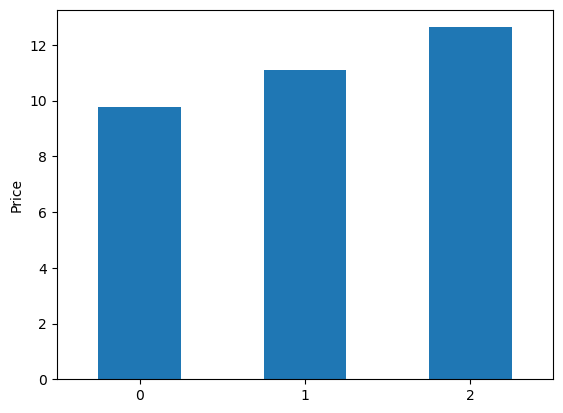

In [21]:
day = datetime.date.today()
data = [{'Color': color.get('alt'), 'Price': float(price), 'Day': day} for color, price in zip(all_colors, all_prices)]

df = pd.DataFrame(data)
#df.set_index('Color', inplace=True)

display(df)
df.plot.bar(rot=0,xlabel='',ylabel='Price',legend=False)

In [14]:
#Recreating the description
#pd.set_option("display.colheader_justify","right")
all_points_desc = list((point.get_text().strip()) for point in description)
df_description = pd.DataFrame([{'Description':desc}for desc in all_points_desc])
df_description.set_index('Description',inplace=True)
#df_description.style.set_table_styles([{'selector': 'th', 'props': [('text-align', 'left')]}, {'selector': 'td', 'props': [('text-align', 'left')]}])
display (df_description)

""
Description
"Smooth, precise and affordable wireless optical 3-button mouse with USB-A nano receiver for laptop, desktop and netbook PCs"
"2.4 GHz wireless (not Bluetooth) provides a powerful, reliable connection"
Nano-receiver stays in your PC USB port or stows conveniently inside the wireless mouse when not in use (note: Receiver is stored within the mouse from production and needs to be removed once opened)
"Works with Windows 2000, XP, Vista, 7, and 8"
10.08 x 5.79 x 3.99 cm; 62.65 Grams


In [15]:
#Searched in gpt how to format the index on the left and how to make the title big

styles = [
    dict(selector="th", props=[("text-align", "left")]),  
    dict(selector="th.row_heading", props=[("text-align", "left")]),  
    dict(selector="td", props=[("text-align", "left")]) 
]

df_description = df_description.style.set_table_styles(styles)

rating2_html = f'<h4 style="text-align: center; font-weight: bold;">{rating}</h4>'
rating2 = HTML(rating2_html)

title_html = f'<h2 style="text-align: center; font-weight: bold;">{product_title}</h2>'
title = HTML(title_html)

In [17]:
#Saving in a csv
#df.to_csv(r'C:\Users\simao\OneDrive\Ambiente de Trabalho\Amazon Mouse.csv', index=False)

In [22]:
#Displaying everything

display(title, rating2, df_description, df)

Description
"Smooth, precise and affordable wireless optical 3-button mouse with USB-A nano receiver for laptop, desktop and netbook PCs"
"2.4 GHz wireless (not Bluetooth) provides a powerful, reliable connection"
Nano-receiver stays in your PC USB port or stows conveniently inside the wireless mouse when not in use (note: Receiver is stored within the mouse from production and needs to be removed once opened)
"Works with Windows 2000, XP, Vista, 7, and 8"
10.08 x 5.79 x 3.99 cm; 62.65 Grams


,Color,Price,Day
0,Black,9.78,2024-04-29
1,Blue,11.08,2024-04-29
2,Red,12.63,2024-04-29


In [23]:
#Now I can append new data
csv = pd.read_csv(r"C:\Users\simao\OneDrive\Ambiente de Trabalho\Amazon Mouse.csv")
new_csv = pd.concat([csv,df])
display (new_csv)
new_csv.to_csv(r'C:\Users\simao\OneDrive\Ambiente de Trabalho\Amazon Mouse.csv', index=False)

,Color,Price,Day
0,Black,9.78,2024-04-26
1,Blue,11.08,2024-04-26
2,Red,12.63,2024-04-26
0,Black,9.78,2024-04-29
1,Blue,11.08,2024-04-29
2,Red,12.63,2024-04-29


In [5]:
#Working in some automation
def mouse_price():
    from bs4 import BeautifulSoup
    import pandas as pd
    import pandas as pd
    import requests
    import datetime
    URL = 'https://www.amazon.co.uk/AmazonBasics-Wireless-Mouse-Receiver-Black/dp/B005EJH6Z4?ref_=ast_sto_dp&th=1&psc=1'
    h = {'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64; rv:125.0) Gecko/20100101 Firefox/125.0'}
    page = requests.get(URL, headers=h)
    soup = BeautifulSoup(page.content, 'html.parser')

    all_colorsx = soup.find(class_="a-unordered-list a-nostyle a-button-list a-declarative a-button-toggle-group a-horizontal a-spacing-top-micro swatches swatchesSquare imageSwatches")
    all_colors = all_colorsx.find_all(class_="imgSwatch")
    all_prices = soup.find(class_="a-unordered-list a-nostyle a-button-list a-declarative a-button-toggle-group a-horizontal a-spacing-top-micro swatches swatchesSquare imageSwatches").get_text().strip().replace('\n','').replace(' ','').split('£')[1:]
    
    day = datetime.date.today()
    data = [{'Color': color.get('alt'), 'Price': float(price), 'Day': day} for color, price in zip(all_colors, all_prices)]

    df = pd.DataFrame(data)
        
    
    csv = pd.read_csv(r"C:\Users\simao\OneDrive\Ambiente de Trabalho\Amazon Mouse.csv")
    new_csv = pd.concat([csv,df])
    new_csv.to_csv(r'C:\Users\simao\OneDrive\Ambiente de Trabalho\Amazon Mouse.csv', index=False)

In [ ]:
#Now with this, every 2 days, I will have the new price on the table
while (True):
    mouse_price()
    time.sleep(172800)